### Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

In [1]:
# Import important libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data Loading

In [2]:
adult_df = pd.read_csv(r"C:\Users\ariya\Downloads\Logistic Regression-20251202T074551Z-1-001\Logistic Regression\adult_data.csv", header=None)
adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [4]:
# Now we should provide column names go gain insights :

adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Provides how many columns and rows are there basically shape of the table (rows,columns) :
adult_df.shape

(32561, 15)

### The info() method prints information about the DataFrame.
The information contains the number of columns, column labels, column data types,   
memory usage, range index, and the number of cells in each column (non-null values).

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### The describe() method returns description of the data in the DataFrame.    
 By default all the columns which contains numerical data are included in the output.    
 To consider or get the description of the object/string data you have to provide "include=all" as an argument in the method.

In [7]:
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Step 2 : Data Preprocessing / Data Cleaning / Data munging

In [8]:
# Create a copy of the Dataframe so that actual data won't affect :
adult_c = pd.DataFrame.copy(adult_df)

In [9]:
adult_c.duplicated().sum() # Shows the duplicated values.

np.int64(24)

In [10]:
# To see that duplicated values :
adult_c[adult_c.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
# Dropping duplicates values and keeping the orignals one.
adult_c.drop_duplicates(inplace=True, keep='first')
adult_c.shape

(32537, 15)

In [12]:
adult_c.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
#Droping columns that are not important.
adult_c.drop(['education_num','fnlwgt','marital_status'], axis = 1, inplace=True)

In [14]:
adult_c.shape

(32537, 12)

In [15]:
adult_c.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [16]:
# Checking unique values for all the columns using for loop() instead of doing one by one.
for i in adult_c.columns:
    print({i:adult_c[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])}
{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)}
{'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)}
{'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',


In [17]:
# Replacing the ? with missing values to handle missing values approch because there is no sense that value=? thats why.
adult_c.replace(' ?', np.nan, inplace=True)

In [18]:
adult_c.isnull().sum()

age                  0
workclass         1836
education            0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [19]:
# How many missing values are there in terms of percentage %.
adult_c.isnull().sum()/len(adult_c)*100

age               0.000000
workclass         5.642807
education         0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.788733
income            0.000000
dtype: float64

#### Value_counts:   
How many times the each unique value occurs.

In [20]:
adult_c.workclass.value_counts() 

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### When to use mean, median or mode :  
- Mean : when you have continuos numeric features then only use mean().  
- Median : When you have continuos or discrete numeric features use median() , but mostly for continous numeric.  
- Mode : When you have discrete / Categorical data then use mode().

In [21]:
adult_c.workclass.mode() # most occuring value in a dataset

0     Private
Name: workclass, dtype: object

In [22]:
adult_c.occupation.mode()# most occuring value in a dataset

0     Prof-specialty
Name: occupation, dtype: object

In [23]:
adult_c.native_country.mode()# most occuring value in a dataset

0     United-States
Name: native_country, dtype: object

### Drop(), Dropna(), Fillna() :
The very first thing is analyse your data carefully then make the decisions that what approach should be used,
If there's few values are null you can drop(), that or use dropna(), and if there are hihg number of missing values and
that are also important then use Fillna() approach.

In [24]:
# Filling values with mode .
adult_c['workclass'].fillna(adult_c.workclass.mode()[0])

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32537, dtype: object

In [25]:
# instead of filling one by one replacing missing values using for loop in all 3 columns .
for value in ['workclass','occupation','native_country']:
    adult_c[value].fillna(adult_c[value].mode()[0], inplace=True)

In [26]:
adult_c.isnull().sum() # Now Missing values has handled.

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [27]:
adult_c.shape

(32537, 12)

---------------------
## Data Encoding :
### Dummy variables using pd.get_dummies()
Converting categorical/discrete features into numerical features.

In [28]:
adult_c_new=pd.get_dummies(adult_c)
adult_c_new.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,2174,0,40,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,0,0,13,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,38,0,0,40,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,0,0,40,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,0,0,40,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
# This is not preffered approch as you see the result.

In [30]:
colname=[]
for x in adult_c.columns:
    if adult_c[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'education',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [31]:
# Converting data from categorical to numerical.
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder() 

for x in colname:
    adult_c[x]=le.fit_transform(adult_c[x]) #fit =  fit the labelEncoder, Transform = coverting categories into num.

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))# le.classes = Bring out all the categories name.
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------------')

Feature workclass
mapping {' Federal-gov': np.int64(0), ' Local-gov': np.int64(1), ' Never-worked': np.int64(2), ' Private': np.int64(3), ' Self-emp-inc': np.int64(4), ' Self-emp-not-inc': np.int64(5), ' State-gov': np.int64(6), ' Without-pay': np.int64(7)}
-----------------------
Feature education
mapping {' 10th': np.int64(0), ' 11th': np.int64(1), ' 12th': np.int64(2), ' 1st-4th': np.int64(3), ' 5th-6th': np.int64(4), ' 7th-8th': np.int64(5), ' 9th': np.int64(6), ' Assoc-acdm': np.int64(7), ' Assoc-voc': np.int64(8), ' Bachelors': np.int64(9), ' Doctorate': np.int64(10), ' HS-grad': np.int64(11), ' Masters': np.int64(12), ' Preschool': np.int64(13), ' Prof-school': np.int64(14), ' Some-college': np.int64(15)}
-----------------------
Feature occupation
mapping {' Adm-clerical': np.int64(0), ' Armed-Forces': np.int64(1), ' Craft-repair': np.int64(2), ' Exec-managerial': np.int64(3), ' Farming-fishing': np.int64(4), ' Handlers-cleaners': np.int64(5), ' Machine-op-inspct': np.int64(6), 

In [32]:
adult_c # Now the LabelEncoder converted categories to numeric data.

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,9,0,1,4,1,2174,0,40,38,0
1,50,5,9,3,0,4,1,0,0,13,38,0
2,38,3,11,5,1,4,1,0,0,40,38,0
3,53,3,1,5,0,2,1,0,0,40,38,0
4,28,3,9,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,12,5,4,0,0,0,38,38,0
32557,40,3,11,6,0,4,1,0,0,40,38,1
32558,58,3,11,0,4,4,0,0,0,40,38,0
32559,22,3,11,0,3,4,1,0,0,20,38,0


In [39]:
# Now all the values has converted into numeric.
adult_c.dtypes

age               int64
workclass         int64
education         int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

-----------------------------
### Splitting the Data :

In [49]:
X = adult_c.values[:,0:-1] # Independent features only
Y = adult_c.values[:,-1] # Dependent feature 'income' only

#values will return an array whereas.iloc will return a df object
#arrays are lighter in weight which indirectly help the model to build faster.

In [50]:
print(X.shape)
print(Y.shape)

(32537, 11)
(32537,)


In [51]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
#scaler.fit(X)
#X = scaler.transform(X)
X=scaler.fit_transform(X)
print(X)

[[ 0.03038995  2.62344898 -0.33526611 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053 -0.33526611 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638  0.18151876 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]]


In [52]:
print(X)# Now it has transform with the help of scaling.

[[ 0.03038995  2.62344898 -0.33526611 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053 -0.33526611 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638  0.18151876 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]]


In [53]:
Y.dtype

dtype('int64')

In [54]:
#y=Y.astype(int) # Its an approch to convert datatype.

----------------------------
### Training the Data

In [55]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.3, random_state=10)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22775, 11)
(9762, 11)
(22775,)
(9762,)


In [57]:
from sklearn.linear_model import LogisticRegression

#creating  a model
classifier = LogisticRegression() 

#fitting training data to model :
classifier.fit(X_train,Y_train) # fit basically learns the new categories , fitting in a brain of computer.

LogisticRegression()

In [58]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
# The left column is for 0 and right is for 1 and which column has greater probability would be consider as 0.
Y_pred_prob = classifier.predict_proba(X_test)
Y_pred_prob

array([[0.86495581, 0.13504419],
       [0.97654711, 0.02345289],
       [0.84865539, 0.15134461],
       ...,
       [0.88668023, 0.11331977],
       [0.93548984, 0.06451016],
       [0.89405115, 0.10594885]])

In [60]:
print(list(zip(Y_test, Y_pred)))

[(np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.in

### Evaluation metrics.

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred) # Here the accuracy is good means the data is balanced
print("Accuracy of the model: ",acc)

[[7098  298]
 [1627  739]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8028068018848596


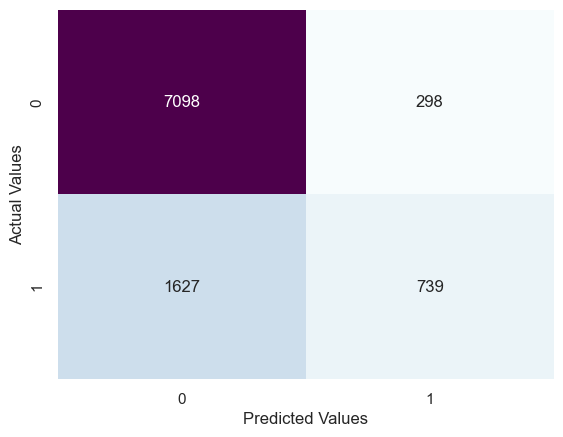

Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8028068018848596


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

**Accuracy:**   
One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.In logistic regression classification accuracy score will help to justify how good is the model performing on correct predictions.

**Precision:**(column - wise)  
It is implied as the measure of the correctly identified positive cases from all the predicted positive cases.  
Thus, it is useful when the costs of False Positives is high.    
Precision tells us about how relevant are our predictions i.e.  
Out of all predicted results how many are accurately predicted.   
**Class 0:** How many -ve predictions are correct?
=TN / TN + FN   

**Class 1:** How many +ve predictions are correct?
=TP / TP + FP  

**Recall:**(row-wise)  
It is the measure of the correctly identified positive cases from all the actual positive cases.  
It is important when the cost of False Negatives is high.  
Recall will help to understand the accuracy of the individual classes.

**Class 0 :** How many -ve cases did we catch?  
Specificity / True Negative Rate  
Specificity formula :  TN / TN + FP

**Specificity** tells us what proportion of the negative class got correctly classified.

False Negative Rate:
FNR = FN / TP + FN   
False Negative Rate (FNR) tells us what proportion of the positive class got incorrectly classified by  
the classifier.

A higher TPR and a lower FNR are desirable since we want to classify the positive class correctly.

**Class 1 :** How many +ve cases did we catch?  
Sensitivity / True Positive Rate  
Sensitivity formula : TP / TP + FN  

**Sensitivity** tells us what proportion of the positive class got correctly classified.

False Positive Rate:
FPR = FP / FP + TN  
FPR tells us what proportion of the negative class got incorrectly classified by the classifier.

A higher TNR and a lower FPR are desirable since we want to classify the negative class correctly.

**F1-score:**  
This is the harmonic mean of Precision and Recall and gives a better measure of the   
incorrectly classified cases than the Accuracy Metric.

We use the Harmonic Mean since it penalizes the extreme values.  

**To summarise the differences between the F1-score and the accuracy,**

* Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
* Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
* In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

**Support:** 
No. of observations in each class.

----------------------------------------------

--------------------------------------------
 ### Model tuning : Threshlod Adjustment

#### predict_proba() returns two probabilities for each row:
- Probability of class 0
- Probability of class 1

In [63]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob

array([[0.86495581, 0.13504419],
       [0.97654711, 0.02345289],
       [0.84865539, 0.15134461],
       ...,
       [0.88668023, 0.11331977],
       [0.93548984, 0.06451016],
       [0.89405115, 0.10594885]])

In [64]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.42:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

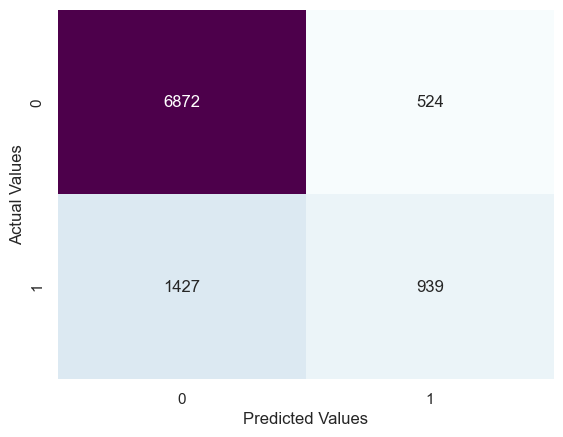

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7396
           1       0.64      0.40      0.49      2366

    accuracy                           0.80      9762
   macro avg       0.73      0.66      0.68      9762
weighted avg       0.78      0.80      0.78      9762

Accuracy of the model:  0.8001434132349928


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

In [66]:
for a in np.arange(0.4,0.61,0.01): # This tries different thresholds: 0.40, 0.41, 0.42, 0.43 … up to 0.60
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]   # cfm[0,1] → FP → Pred 1 but Actual 0 (Type-2 error), cfm[1,0] → FN → Pred 0 but Actual 1 (Type-1 error)
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1975  , type 2 error : 1371  , type 1 error: 604
Errors at threshold  0.41000000000000003 : 1970  , type 2 error : 1401  , type 1 error: 569
Errors at threshold  0.42000000000000004 : 1951  , type 2 error : 1427  , type 1 error: 524
Errors at threshold  0.43000000000000005 : 1945  , type 2 error : 1456  , type 1 error: 489
Errors at threshold  0.44000000000000006 : 1956  , type 2 error : 1494  , type 1 error: 462
Errors at threshold  0.45000000000000007 : 1953  , type 2 error : 1516  , type 1 error: 437
Errors at threshold  0.4600000000000001 : 1952  , type 2 error : 1543  , type 1 error: 409
Errors at threshold  0.4700000000000001 : 1949  , type 2 error : 1568  , type 1 error: 381
Errors at threshold  0.4800000000000001 : 1941  , type 2 error : 1587  , type 1 error: 354
Errors at threshold  0.4900000000000001 : 1932  , type 2 error : 1610  , type 1 error: 322
Errors at threshold  0.5000000000000001 : 1925  , type 2 error : 1627  , type 1 error: 298
Errors at

---------------------------------------------------

### Unseen data : Testing phase  
Loading data for testing becaue client will not undertand the actual sorted data.

In [67]:
adult_df1=pd.read_csv(r"C:\Users\ariya\Downloads\Logistic Regression-20251202T074551Z-1-001\Logistic Regression\adult_test (1).csv", header=None)
adult_df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [68]:
# Assigning the column names go gain insights :

adult_df1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Data Preprocessing / Data Cleaning / Data munging

In [69]:
adult_df1.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [70]:
#Droping columns that are not important same as did earlier.
adult_df1.drop(['education_num','fnlwgt','marital_status'], axis = 1, inplace=True)

In [71]:
adult_df1

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,11th,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,Some-college,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,Bachelors,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,HS-grad,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,Bachelors,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,Bachelors,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [72]:
# Replacing the ? with missing values to handle missing values approch because there is no sense that value=? thats why.
adult_df1.replace(' ?', np.nan, inplace=True)

In [73]:
adult_df1.isnull().sum()

age                 0
workclass         963
education           0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [74]:
adult_df1.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [75]:
# Checking unique values for all the columns using for loop() instead of doing one by one.
for i in adult_df1.columns:
    print({i:adult_c[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])}
{'workclass': array([6, 5, 3, 0, 1, 4, 7, 2])}
{'education': array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])}
{'occupation': array([ 0,  3,  5,  9,  7, 11,  2, 13,  4,  6, 12, 10,  1,  8])}
{'relationship': array([1, 0, 5, 3, 4, 2])}
{'race': array([4, 2, 1, 0, 3])}
{'sex': array([1, 0])}
{'capital_gain': array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  21

In [76]:
adult_df1.workclass.value_counts()

workclass
Private             11210
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: count, dtype: int64

In [77]:
adult_df1.workclass.mode() # most occuring value in a dataset

0     Private
Name: workclass, dtype: object

In [78]:
adult_df1.occupation.mode()# most occuring value in a dataset

0     Prof-specialty
Name: occupation, dtype: object

In [79]:
adult_df1.native_country.mode()# most occuring value in a dataset

0     United-States
Name: native_country, dtype: object

In [80]:
adult_df1['workclass'].fillna(adult_c.workclass.mode()[0])

0              Private
1              Private
2            Local-gov
3              Private
4                    3
             ...      
16276          Private
16277                3
16278          Private
16279          Private
16280     Self-emp-inc
Name: workclass, Length: 16281, dtype: object

In [81]:
# instead of filling one by one replacing missing values using for loop in all 3 columns .
for value in ['workclass','occupation','native_country']:
    adult_df1[value].fillna(adult_df1[value].mode()[0], inplace=True)

In [82]:
adult_df1.isnull().sum() # Now Missing values has handled.

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Dummy variables using pd.get_dummies()
Converting categorical/discrete features into numerical features.

In [83]:
adult_df1_new=pd.get_dummies(adult_df1)
adult_df1_new.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K.,income_ >50K.
0,25,0,0,40,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,0,0,50,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,0,0,40,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,7688,0,40,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,0,0,30,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [84]:
colname=[]
for x in adult_df1.columns:
    if adult_df1[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'education',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [85]:
# For  preprocessing the data
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder() 

for x in colname:
    adult_df1[x]=le.fit_transform(adult_df1[x]) #fit =  fit the labelEncoder, Transform = coverting categories into num.

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))# le.classes = Bring out all the categories name.
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------------')

Feature workclass
mapping {' Federal-gov': np.int64(0), ' Local-gov': np.int64(1), ' Never-worked': np.int64(2), ' Private': np.int64(3), ' Self-emp-inc': np.int64(4), ' Self-emp-not-inc': np.int64(5), ' State-gov': np.int64(6), ' Without-pay': np.int64(7)}
-----------------------
Feature education
mapping {' 10th': np.int64(0), ' 11th': np.int64(1), ' 12th': np.int64(2), ' 1st-4th': np.int64(3), ' 5th-6th': np.int64(4), ' 7th-8th': np.int64(5), ' 9th': np.int64(6), ' Assoc-acdm': np.int64(7), ' Assoc-voc': np.int64(8), ' Bachelors': np.int64(9), ' Doctorate': np.int64(10), ' HS-grad': np.int64(11), ' Masters': np.int64(12), ' Preschool': np.int64(13), ' Prof-school': np.int64(14), ' Some-college': np.int64(15)}
-----------------------
Feature occupation
mapping {' Adm-clerical': np.int64(0), ' Armed-Forces': np.int64(1), ' Craft-repair': np.int64(2), ' Exec-managerial': np.int64(3), ' Farming-fishing': np.int64(4), ' Handlers-cleaners': np.int64(5), ' Machine-op-inspct': np.int64(6), 

In [86]:
adult_df1

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,1,6,3,2,1,0,0,40,37,0
1,38,3,11,4,0,4,1,0,0,50,37,0
2,28,1,7,10,0,4,1,0,0,40,37,1
3,44,3,15,6,0,2,1,7688,0,40,37,1
4,18,3,15,9,3,4,0,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,9,9,1,4,0,0,0,36,37,0
16277,64,3,11,9,2,2,1,0,0,40,37,0
16278,38,3,9,9,0,4,1,0,0,50,37,0
16279,44,3,9,0,3,1,1,5455,0,40,37,0


In [87]:
adult_df1.dtypes

age               int64
workclass         int64
education         int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

### Splitting the data :

In [88]:
X_test_new = adult_df1.values[:,0:-1] # Independent features only
Y_test_new = adult_df1.values[:,-1] # Dependent feature 'income' only

In [89]:
Y_test_new.shape

(16281,)

In [90]:
X_test_new = scaler.transform(X_test_new)

In [91]:
print(X_test_new)

[[-0.99617055 -0.08527638 -2.4024056  ... -0.21674317 -0.03566374
   0.09594355]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317  0.77426932
   0.09594355]
 [-0.7761933  -1.89109329 -0.85205098 ... -0.21674317 -0.03566374
   0.09594355]
 ...
 [-0.0429358  -0.08527638 -0.33526611 ... -0.21674317  0.77426932
   0.09594355]
 [ 0.3970187  -0.08527638 -0.33526611 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.26291305  0.81763207 -0.33526611 ... -0.21674317  1.58420237
   0.09594355]]


In [92]:
y_pred_prob = classifier.predict_proba(X_test_new)
y_pred_prob

array([[0.95324343, 0.04675657],
       [0.69794893, 0.30205107],
       [0.81813328, 0.18186672],
       ...,
       [0.7083223 , 0.2916777 ],
       [0.57793075, 0.42206925],
       [0.69256651, 0.30743349]])

In [93]:
y_pred_new=[]
for value in y_pred_prob[:,1]:
    if value > 0.42:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
print(y_pred_new)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

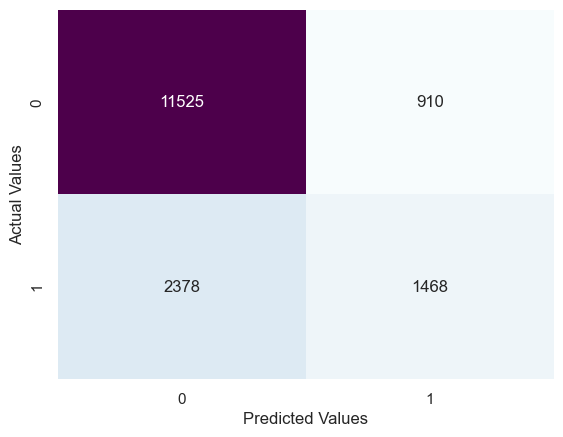

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12435
           1       0.62      0.38      0.47      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.65      0.67     16281
weighted avg       0.78      0.80      0.78     16281

Accuracy of the model:  0.7980468030219274


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test_new,y_pred_new)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report: ")
 
print(classification_report(Y_test_new,y_pred_new))
 
acc=accuracy_score(Y_test_new, y_pred_new)
print("Accuracy of the model: ",acc)

In [95]:
# Again loading the file because to handover the client here we will add prediction column that we have predicted .

In [96]:
adult_test=pd.read_csv(r"C:\Users\ariya\Downloads\Logistic Regression-20251202T074551Z-1-001\Logistic Regression\adult_test (1).csv", header=None)
adult_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [97]:
adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [98]:
# Adding new column for client
adult_test['Prediction']=y_pred_new
adult_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Prediction
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,1


In [99]:
adult_test['income'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

#### Now converting the 0 and 1 with real values because client will not understand probability values.

In [100]:
# Using manual mapping 
adult_test['Prediction']=adult_test['Prediction'].map({0:'<=50k.', 1:'>50k.'})
adult_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Prediction
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,<=50k.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,<=50k.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,<=50k.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,>50k.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,<=50k.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,<=50k.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,<=50k.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,<=50k.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,>50k.


#### Overfitting: When Your Model Tries Too Hard
Overfitting occurs when a model learns the training data too well, including its noise and outliers. As a result, it performs poorly on unseen data because it’s too tailored to the specificities of the training set.


#### Underfitting: Oversimplifying the Problem
Underfitting is the opposite issue. Here, the model is too simple to capture the underlying patterns in the data. It underperforms even on the training data because it doesn’t learn enough from it.

In [101]:
# To export the file at working directory
adult_test.to_csv('Output Prediction.csv', header=True, index=False)

### --------------------------------------------END-------------------------------------------------------